In [21]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [22]:
# Function Definitions
def preprocess_data(df):
    X = df.drop(columns=['y'])
    y = df['y']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)
    return X_train, X_valid, y_train, y_valid

In [23]:
def evaluate_model(model, X_valid, y_valid):
    y_pred = model.predict(X_valid)
    print(classification_report(y_valid, y_pred, zero_division=1))

In [24]:
# Load the dataset
df = pd.read_csv("bank-full.csv", delimiter=";")
# Define feature types
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
binary_features = ['default', 'housing', 'loan', 'y']

In [25]:
# pre-processing categorical_features
label_encoder = LabelEncoder()
for column in categorical_features:
    if column in df.columns: 
        df[column] = label_encoder.fit_transform(df[column])

for column in binary_features:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

In [26]:
# Split the dataset based on the "marital" feature into three populations: married, single, and divorced
pop_married = df[df['marital'] == 1]
pop_single = df[df['marital'] == 2]
pop_divorced = df[df['marital'] == 0]
pca = PCA(n_components=0.5)

# ANN

In [27]:
def fit_ann(X_train, y_train):
    # Define the parameter grid
    parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
    
    # Create the model
    model = MLPClassifier(max_iter=1000, random_state=42)
    
    # Perform grid search
    grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its mean accuracy
    best_model = grid_search.best_estimator_
    mean_accuracy = grid_search.best_score_
    
    # Plot the 5-fold cross-validation scores
    scores = grid_search.cv_results_['mean_test_score']
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')
    plt.title('5-Fold Cross-Validation Accuracy')
    plt.xlabel('Configuration')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, len(scores) + 1))
    plt.grid(True)
    plt.show()

    # Print the mean accuracy over 5 folds
    print("Mean accuracy over 5 folds:", mean_accuracy)

    return best_model



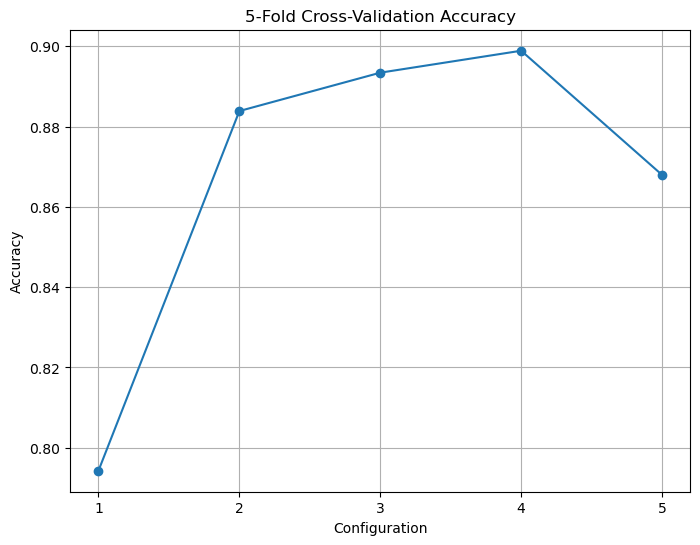

Mean accuracy over 5 folds: 0.898905769137642
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2443
           1       1.00      0.00      0.00       279

    accuracy                           0.90      2722
   macro avg       0.95      0.50      0.47      2722
weighted avg       0.91      0.90      0.85      2722



In [28]:
# Preprocess data for married population and split into train/validation sets
X_train_married, X_valid_married, y_train_married, y_valid_married = train_test_split(pop_married.drop(columns=['y']), pop_married['y'], test_size=0.1, random_state=42)

# Dimensionality Reduction for married population
X_train_married_pca = pca.fit_transform(X_train_married)

# Fit PCA with training data for married population
pca.fit(X_train_married)

# Transform validation data for married population
X_valid_married_pca = pca.transform(X_valid_married)

# Model fitting after dimensionality reduction for married population
ann_married_pca = fit_ann(X_train_married_pca, y_train_married)

# Model evaluation on validation set after dimensionality reduction for married population
evaluate_model(ann_married_pca, X_valid_married_pca, y_valid_married)

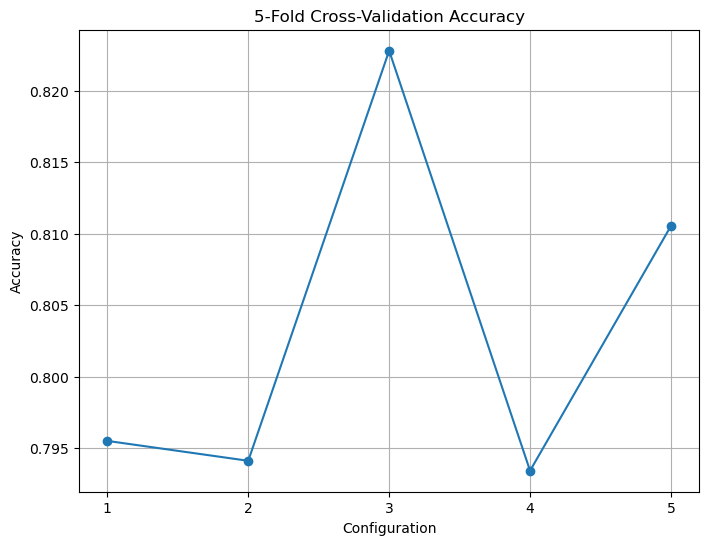

Mean accuracy over 5 folds: 0.8227878267043366
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1089
           1       0.21      0.17      0.19       190

    accuracy                           0.78      1279
   macro avg       0.53      0.53      0.53      1279
weighted avg       0.76      0.78      0.77      1279



In [29]:
# Preprocess data for single population and split into train/validation sets
X_train_single, X_valid_single, y_train_single, y_valid_single = preprocess_data(pop_single)

# Dimensionality Reduction for single population
X_train_single_pca = pca.fit_transform(X_train_single)

# Fit PCA with training data for single population
pca.fit(X_train_single)

# Transform validation data for single population
X_valid_single_pca = pca.transform(X_valid_single)

# Model fitting after dimensionality reduction for single population
ann_single_pca = fit_ann(X_train_single_pca, y_train_single)

# Model evaluation on validation set after dimensionality reduction for single population
evaluate_model(ann_single_pca, X_valid_single_pca, y_valid_single)

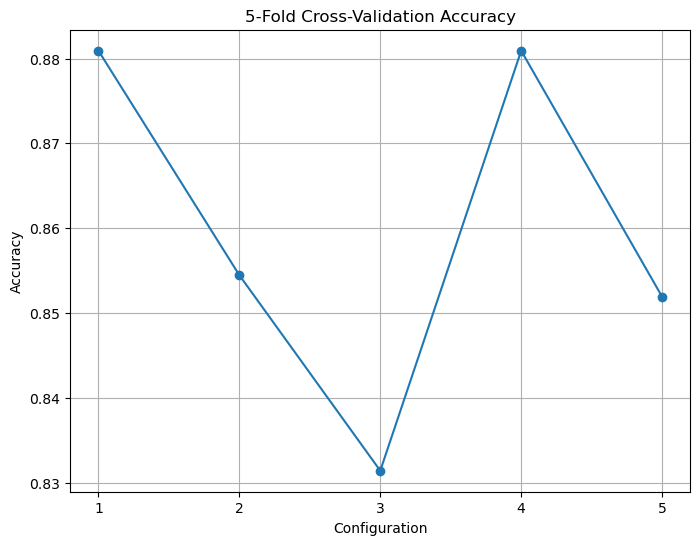

Mean accuracy over 5 folds: 0.8809219643511366
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       457
           1       0.14      0.09      0.11        64

    accuracy                           0.82       521
   macro avg       0.51      0.51      0.50       521
weighted avg       0.79      0.82      0.80       521



In [30]:
# Preprocess data for divorced population and split into train/validation sets
X_train_divorced, X_valid_divorced, y_train_divorced, y_valid_divorced = preprocess_data(pop_divorced)

# Dimensionality Reduction for divorced population
X_train_divorced_pca = pca.fit_transform(X_train_divorced)

# Fit PCA with training data for divorced population
pca.fit(X_train_divorced)

# Transform validation data for divorced population
X_valid_divorced_pca = pca.transform(X_valid_divorced)

# Model fitting after dimensionality reduction for divorced population
ann_divorced_pca = fit_ann(X_train_divorced_pca, y_train_divorced)

# Model evaluation on validation set after dimensionality reduction for divorced population
evaluate_model(ann_divorced_pca, X_valid_divorced_pca, y_valid_divorced)

# Decision Tree

In [31]:
def fit_decision_tree(X_train, y_train):
    parameters = {'max_depth': [None, 5, 10, 15, 20]}

    model = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = DecisionTreeClassifier(random_state=42, **best_params)
    best_model.fit(X_train, y_train)

    # Plot the 5-fold cross-validation scores
    cv_results = grid_search.cv_results_
    scores = cv_results['mean_test_score']
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')
    plt.title('5-Fold Cross-Validation Accuracy (Decision Tree)')
    plt.xlabel('Hyperparameter Configuration')
    plt.ylabel('Mean Accuracy')
    plt.grid(True)
    plt.show()

    # Print the mean accuracy over 5 folds
    print("Mean accuracy over 5 folds:", grid_search.best_score_)

    return best_model


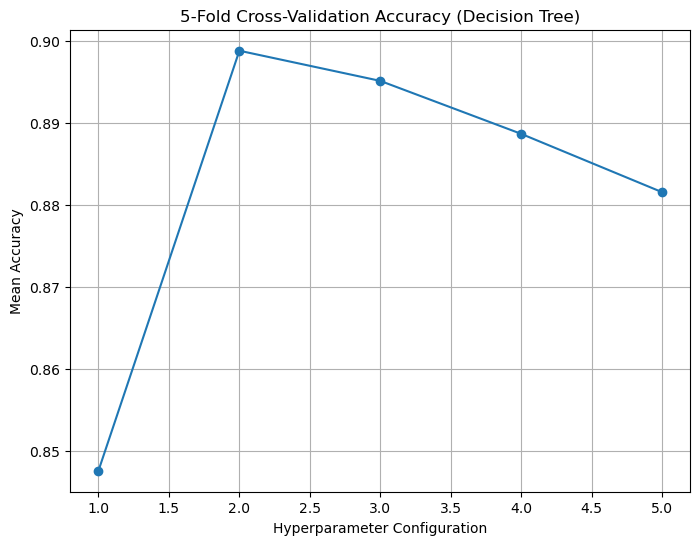

Mean accuracy over 5 folds: 0.8987832701584668
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2443
           1       0.00      0.00      1.00       279

    accuracy                           0.90      2722
   macro avg       0.45      0.50      0.97      2722
weighted avg       0.81      0.90      0.95      2722



In [32]:
# Preprocess data for married population and split into train/validation sets
X_train_married, X_valid_married, y_train_married, y_valid_married = preprocess_data(pop_married)

# Dimensionality Reduction for married population
X_train_married_pca = pca.fit_transform(X_train_married)

# Fit PCA with training data for married population
pca.fit(X_train_married)

# Transform validation data for married population
X_valid_married_pca = pca.transform(X_valid_married)

# Model fitting after dimensionality reduction for married population
decision_tree_married_pca = fit_decision_tree(X_train_married_pca, y_train_married)

# Model evaluation on validation set after dimensionality reduction for married population
evaluate_model(decision_tree_married_pca, X_valid_married_pca, y_valid_married)

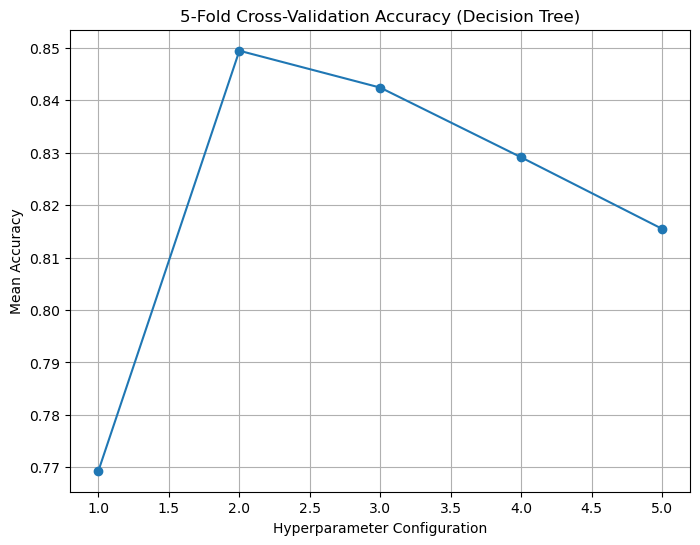

Mean accuracy over 5 folds: 0.8494484020201053
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1089
           1       0.67      0.02      0.04       190

    accuracy                           0.85      1279
   macro avg       0.76      0.51      0.48      1279
weighted avg       0.83      0.85      0.79      1279



In [33]:
# Preprocess data for single population and split into train/validation sets
X_train_single, X_valid_single, y_train_single, y_valid_single = preprocess_data(pop_single)

# Dimensionality Reduction for single population
X_train_single_pca = pca.fit_transform(X_train_single)

# Fit PCA with training data for single population
pca.fit(X_train_single)

# Transform validation data for single population
X_valid_single_pca = pca.transform(X_valid_single)

# Model fitting after dimensionality reduction for single population
decision_tree_single_pca = fit_decision_tree(X_train_single_pca, y_train_single)

# Model evaluation on validation set after dimensionality reduction for single population
evaluate_model(decision_tree_single_pca, X_valid_single_pca, y_valid_single)

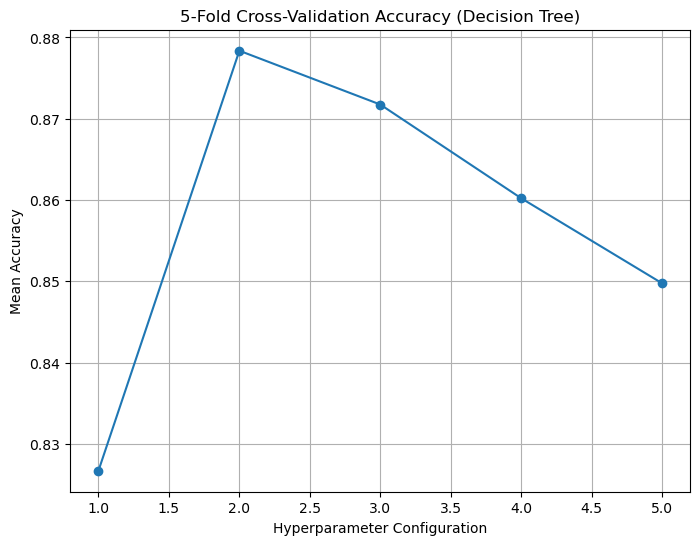

Mean accuracy over 5 folds: 0.8783605982892368
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       457
           1       0.00      0.00      1.00        64

    accuracy                           0.87       521
   macro avg       0.44      0.50      0.97       521
weighted avg       0.77      0.87      0.94       521



In [34]:
# Preprocess data for divorced population and split into train/validation sets
X_train_divorced, X_valid_divorced, y_train_divorced, y_valid_divorced = preprocess_data(pop_divorced)

# Dimensionality Reduction for divorced population
X_train_divorced_pca = pca.fit_transform(X_train_divorced)

# Fit PCA with training data for divorced population
pca.fit(X_train_divorced)

# Transform validation data for divorced population
X_valid_divorced_pca = pca.transform(X_valid_divorced)

# Model fitting after dimensionality reduction for divorced population
decision_tree_divorced_pca = fit_decision_tree(X_train_divorced_pca, y_train_divorced)

# Model evaluation on validation set after dimensionality reduction for divorced population
evaluate_model(decision_tree_divorced_pca, X_valid_divorced_pca, y_valid_divorced)